In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

랜딩 클럽에 대출을 신청한 사람들을 평가하기 위해 연간 소득 정보

         income  type
20169   18000.0  Data
27731   52000.0  Data
18942  104000.0  Data
11850   94000.0  Data
27556   93000.0  Data


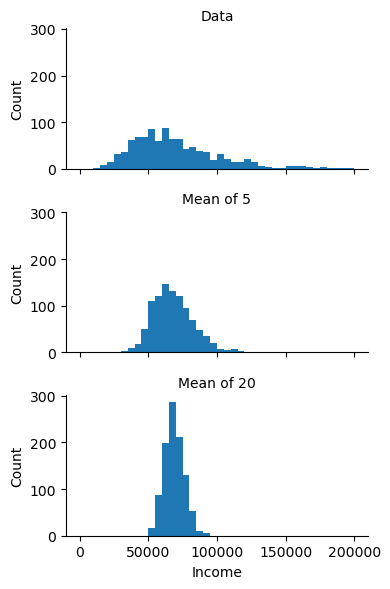

In [4]:
loans_income = pd.read_csv('../제공자료/data/loans_income.csv').squeeze('columns')

sample_data = pd.DataFrame({
    'income': loans_income.sample(1000),
    'type': 'Data',
})

sample_mean_05 = pd.DataFrame({
    'income': [loans_income.sample(5).mean() for _ in range(1000)],
    'type': 'Mean of 5',
})

sample_mean_20 = pd.DataFrame({
    'income': [loans_income.sample(20).mean() for _ in range(1000)],
    'type': 'Mean of 20',
})

results = pd.concat([sample_data, sample_mean_05, sample_mean_20])
print(results.head())

g = sns.FacetGrid(results, col='type', col_wrap=1, 
                  height=2, aspect=2)
g.map(plt.hist, 'income', range=[0, 200000], bins=40)
g.set_axis_labels('Income', 'Count')
g.set_titles('{col_name}')

plt.tight_layout()
plt.show()